In [1]:
from __future__ import print_function
import numpy as np
from bootstrap import *

def main():
    args, logger = parsing()
    encoder_parameters, classifier_parameters = [], []
    logger.info('==> Building model..')
    net = get_model(
        args.model_name, 
        num_cls=args.num_cls, 
        adapted_dim=args.adapted_dim, 
        channels=args.channels,
        vib=args.vib,
        frozen=args.frozen
    )
    if args.load_path:
        logger.info('==> Loading model..')
        net.load_state_dict(torch.load(args.load_path))
        
    logger.info('==> Preparing datasets..')
    datasets = prepare_datasets(args)
    loaders = prepare_loaders(args, datasets)

    logger.info('==> Creating pretext tasks.')
    sstasks = parse_tasks(args, net, datasets['source']['train'], datasets['target']['unlabeled'])

    if len(sstasks) == 0:
        logger.info('==> No pretext task.')
    else:
        for sstask in sstasks:
            logger.info('==> Created pretext task: {}'.format(sstask.name))

    logger.info('==> Creating Optimizer & Building modules...')
    optimizers = {}
    params_lr = {}
    encoder_parameters, classifier_parameters = net.get_parameters()
    all_parameters = encoder_parameters + classifier_parameters
    modules = building_modules(args, net, optimizers, all_parameters, params_lr, logger)
    
    encoder_optimizer = optim.Adam(encoder_parameters, lr=args.lr)
    classifier_optimizer = optim.Adam(classifier_parameters, lr=args.lr)
    main_optimizer = optim.Adam(all_parameters, lr=args.lr)
    optimizers['main'] = main_optimizer
    optimizers['encoder'] = encoder_optimizer
    optimizers['classifier'] = classifier_optimizer
    params_lr['main'] = []
    params_lr['encoder'] = []
    params_lr['classifier'] = []
    
    for param_group in main_optimizer.param_groups:
        params_lr['main'].append(param_group["lr"])
    for param_group in encoder_optimizer.param_groups:
        params_lr['encoder'].append(param_group["lr"])
    for param_group in classifier_optimizer.param_groups:
        params_lr['classifier'].append(param_group["lr"])
    
    all_epoch_stats = []
    best_tgt_te_err = 100
    logger.info('==> Running..')
    for epoch in range(1, args.nepoch + 1):
        logger.info(
            'Source epoch %d/%d main_lr=%.6f' % (
                epoch, 
                args.nepoch, main_optimizer.param_groups[0]['lr']
            )
        )
        tg_te_err = train(
            args, 
            epoch,
            sstasks, 
            optimizers,
            loaders,
            logger,
            modules,
            params_lr
        )
        if epoch % 10 == 0 and args.moco_finetune == False:
            torch.save(net.state_dict(), args.outf + '/net_epoch_{}.pth'.format(str(epoch)))
    #     if tg_te_err < best_tgt_te_err:
    #         best_tgt_te_err = tg_te_err
    #         torch.save(net.state_dict(), args.outf + '/net_epoch_{}.pth'.format(str(epoch)))


----------------- Options ---------------
                        K: 256                           
              adapted_dim: 512                           
              adj_lr_func: none                          
                annealing: none                          
               batch_size: 8                             
                 channels: 3                             
              contrastive: False                         
                   cosine: False                         
                data_root: /nfs/volume-92-5/wangyezhen_i/Datasets/CityCam
                  dataset: citycam                       
        domain_shift_type: convention                    
                  dropout: False                         
                     flip: False                         
                   frozen: []                            
                      gpu: [0]                           
               image_size: 256                           
             

==> begin to load ids.
citycam source train set size: 5562
citycam labeled target train set size: 58
citycam unlabeled target train set size: 4105
citycam source test set size: 5000
citycam target test set size: 1675


/home/luban/anaconda3/envs/YezhenWang/lib/python3.6/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


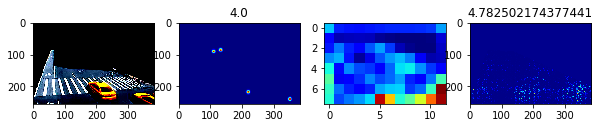

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


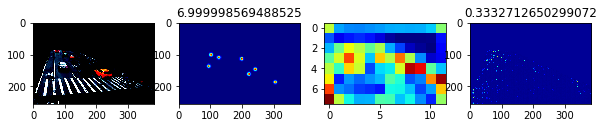

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


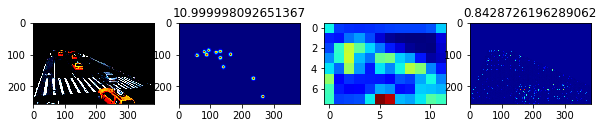

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


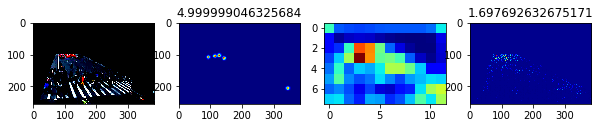

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


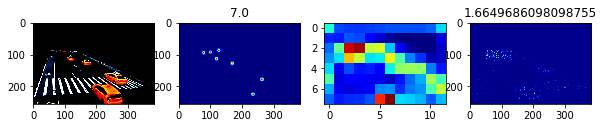

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


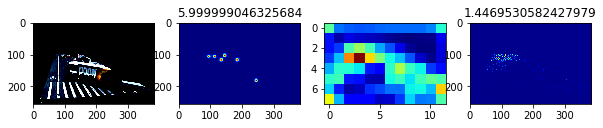

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


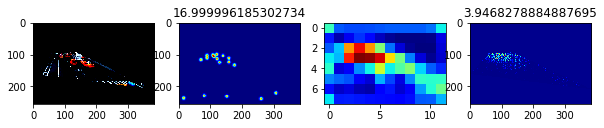

tgt_test_acc: 13.05 ; src_test_acc: 5.35src_cls_loss : 0.60622, tgt_cls_loss : 0.64103, transfer_loss : 0.00000, 
Source epoch 2/1000 main_lr=0.000010


In [ ]:
import sys
if __name__ == '__main__':
    logf_root='/nfs/volume-92-5/wangyezhen_i/Projects/Theoretical_Projects/InstaPBM-V1/output/convention/citycam/sourceonly/'
    sys.argv = [
        '',
        '--dataset', 'citycam',
        '--domain_shift_type', 'convention',
        '--source', '170',
        '--target', '398',
        '--nepoch', '1000',
        '--model_name', 'CountingNet',
        '--image_size', '256',
        '--channels', '3',
        '--num_cls', '1',
        '--adapted_dim', '512',
        '--lr', '1e-5',
        '--milestone', '1000',
        '--data_root', '/nfs/volume-92-5/wangyezhen_i/Datasets/CityCam',
        '--outf', '/nfs/volume-92-5/wangyezhen_i/CheckPoints/CLMS/253_398_visda2017_source_only', 
        '--logf', logf_root + '253_398_counting_source_only.txt',
        '--batch_size', '8',
        '--nthreads', '8',
        '--method', 'source_only',
        '--logger_file_name', 'counting_source_only',
        '--task_type', 'reg',
        '--trade_off', '0.1',
        '--optimizer', 'adam'
    ]
    main()

In [1]:
a = '123'
b = a.split('_')[0]

In [2]:
b

'123'